<a href="https://colab.research.google.com/github/advait-t/Machine-Learning/blob/master/ML_LAB_4_EX_1_J057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2)
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [44]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [45]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], inplace= True, axis = 'columns')

In [46]:
# df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-status'}, inplace=True)

In [47]:
years = range(1980,2014)
df_can['Total'] = df_can.sum(axis = 'columns')
df_can.rename(columns = {"OdName":"Country","AreaName":"Continent","RegName":'Region'}, inplace = True)
df_can.set_index('Country', inplace= True)

In [48]:
df_continents = df_can.groupby('Continent', axis = 'index').sum()

In [49]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


# Q1. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

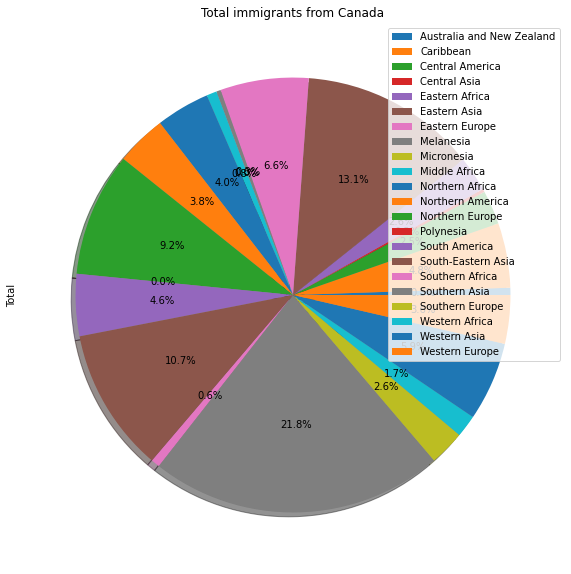

In [50]:
explodelist = [0,0,0.2,0,0,0]
df_con_region = df_can.groupby("Region", axis='rows').sum()
df_con_region['Total'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', shadow = True, labels = None)
plt.title("Total immigrants from Canada")
plt.legend(labels = df_con_region.index, loc = 'upper right' )

# Q2.By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows

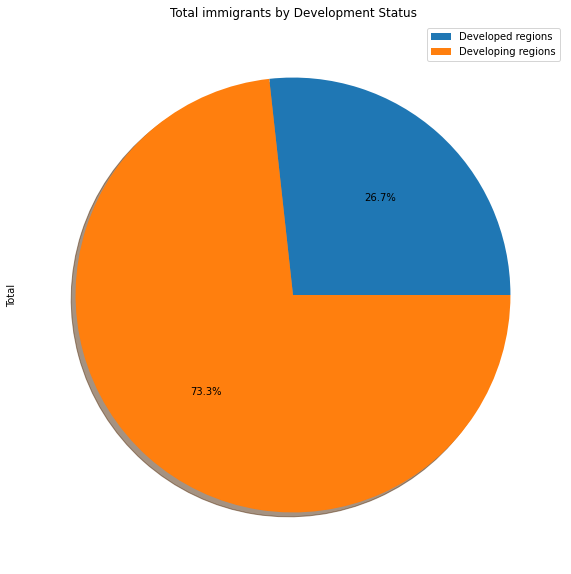

In [51]:
df_dev = df_can.groupby('DevName', axis = 'rows').sum()
df_dev['Total'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', shadow = True, labels = None)
plt.title("Total immigrants by Development Status")
plt.legend(labels = df_dev.index, loc = 'upper right' )

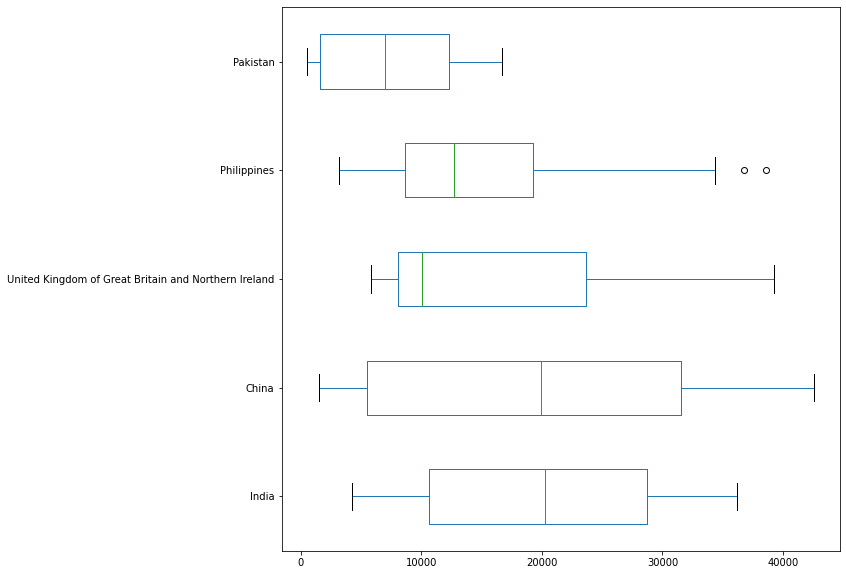

In [52]:
df_can.sort_values(by = 'Total', axis = 'index', inplace = True, ascending = False)
df_top5 = df_can.head(5)
df_top5 = df_top5[years]
df_top5 = df_top5.transpose()
df_top5.plot(kind = 'box', figsize = (10,10), vert = False)

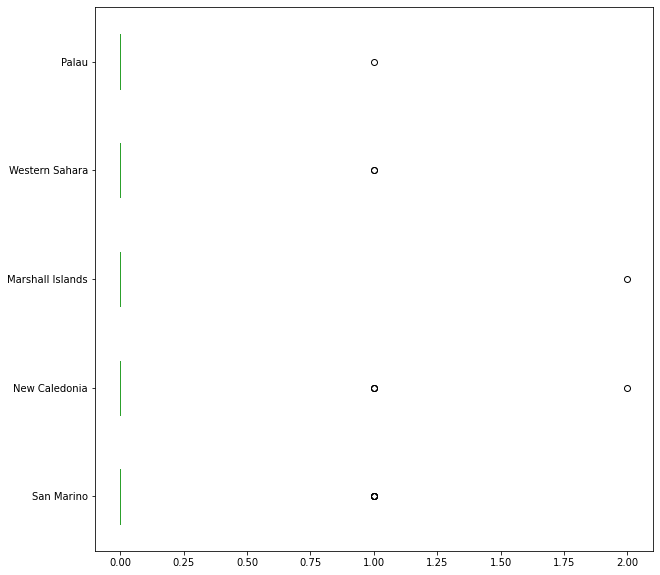

In [53]:
df_can.sort_values(by = 'Total', axis = 'index', inplace = True, ascending = False)
df_bot5 = df_can.tail(5)
df_bot5 = df_bot5[years]
df_bot5 = df_bot5.transpose()
df_bot5.plot(kind = 'box', figsize = (10,10), vert = False)

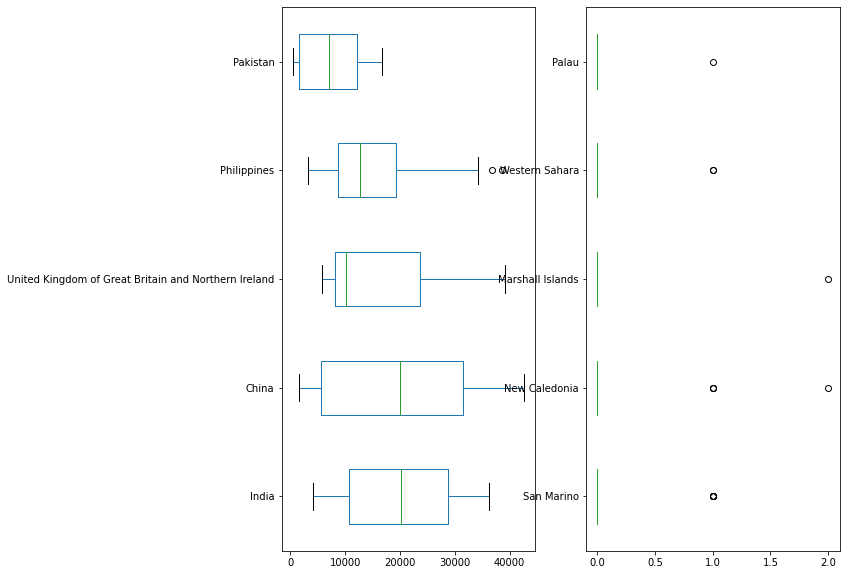

In [54]:
#using subplots
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_top5.plot(kind = 'box', figsize = (10,10), vert = False, ax = ax1)

df_bot5.plot(kind = 'box', figsize = (10,10), vert = False, ax = ax2)

# Q3. Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania

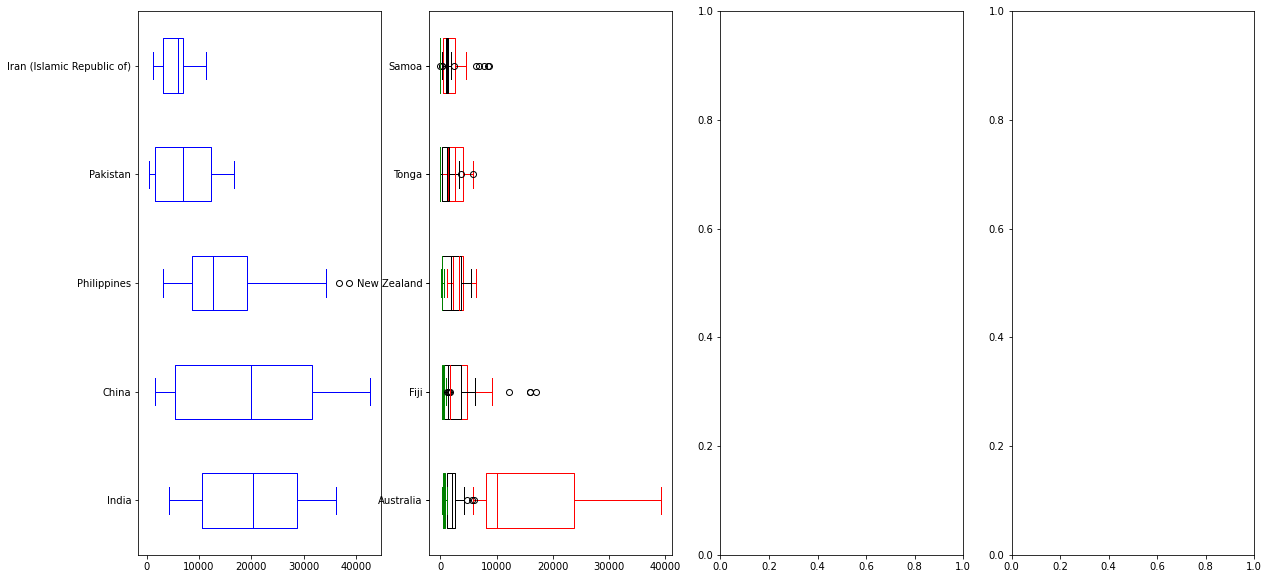

In [55]:
asia = df_can[df_can['Continent']=='Asia'].head(5)
asia = asia[years].transpose()
europe = df_can[df_can['Continent']=='Europe'].head(5)
europe = europe[years].transpose()
africa = df_can[df_can['Continent']=='Africa'].head(5)
africa = africa[years].transpose()
oceania = df_can[df_can['Continent']=='Oceania'].head(5)
oceania = oceania[years].transpose()
fig = plt.figure()

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

asia.plot(kind="box",figsize=(20,10),vert=False,color='blue', ax=ax0)
europe.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax1)
africa.plot(kind="box",figsize=(20,10),vert=False,color='black', ax=ax1)
oceania.plot(kind="box",figsize=(20,10),vert=False,color='green', ax=ax1)

# Q4. Identify countries which are outliers based on total migration

In [60]:
for country in df_can.index:
  df = df_can.loc[[country], years].transpose().describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print("----")

Country
India    55792.125
dtype: float64
Country
India   -16454.875
dtype: float64
----
Country
China    70652.125
dtype: float64
Country
China   -33570.875
dtype: float64
----
Country
United Kingdom of Great Britain and Northern Ireland    47095.375
dtype: float64
Country
United Kingdom of Great Britain and Northern Ireland   -15315.625
dtype: float64
----
Country
Philippines    35128.0
dtype: float64
Country
Philippines   -7216.0
dtype: float64
----
Country
Pakistan    28298.875
dtype: float64
Country
Pakistan   -14474.125
dtype: float64
----
Country
United States of America    12313.5
dtype: float64
Country
United States of America    1693.5
dtype: float64
----
Country
Iran (Islamic Republic of)    12745.0
dtype: float64
Country
Iran (Islamic Republic of)   -2751.0
dtype: float64
----
Country
Sri Lanka    9307.625
dtype: float64
Country
Sri Lanka   -1163.375
dtype: float64
----
Country
Republic of Korea    11054.25
dtype: float64
Country
Republic of Korea   -2787.75
dtype: float64


# Q5. Plot the bubble plot for Norway, Denmark, Finland

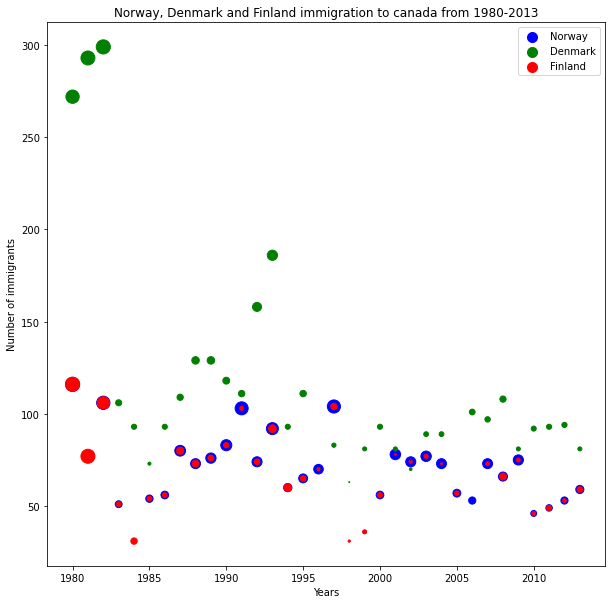

In [61]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Finland'] - df['Finland'].min()) / (df['Finland'].max() - df['Finland'].min())


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0,
    s = normfin*200
)


ax0.set_title("Norway, Denmark and Finland immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')